Number of training examples:
300
300
Number of testing examples
100
100


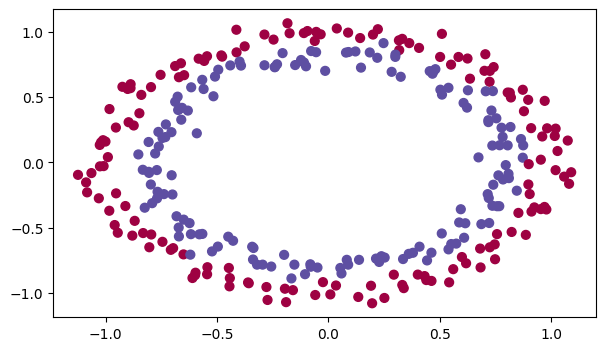

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import init_utils
from init_utils import sigmoid, relu, compute_loss, forward_propagation, backward_propagation
from init_utils import update_parameters, predict, load_dataset, plot_decision_boundary, predict_dec

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# load image dataset: blue/red dots in circles
train_X, train_Y, test_X, test_Y = load_dataset()
print("Number of training examples:")
print(len(train_X[0]))
print(len(train_Y[0]))
print("Number of testing examples")
print(len(test_X[0]))
print(len(test_Y[0]))

In general initialization of weights and parameters kind of affect the symmetry of neurons and the output given by the output layer so we will try three different methods to initialize the parameters
1. Zeros Initialization:
Idea: Set all the initial weights to zero.
Effect: This leads to symmetry between neurons in the same layer. During backpropagation, all neurons in a given layer will update to the same values. As a result, each neuron will compute the same output and have the same gradient during backpropagation. This symmetry problem makes it challenging for the network to learn complex representations.
2. Random Initialization:
Idea: Initialize the weights with random values.
Effect: Breaking the symmetry by introducing randomness is crucial for the learning process. It helps avoid the issue of all neurons in a layer learning the same features. However, initializing weights with large random values can lead to exploding or vanishing gradients during training, making it difficult for the network to learn effectively.
3. He Initialization:
Idea: This initialization is designed to address the vanishing/exploding gradient problem. It scales the weights based on the number of input units in the layer.
Effect: He initialization sets the weights to random values drawn from a Gaussian distribution with mean 0 and a standard deviation of root(2/number of input units) for a given layer. By using this scaling factor, He initialization helps prevent the gradients from vanishing or exploding too quickly during training, promoting stable and efficient learning.

In [21]:
def model(X, Y, learning_rate = 0.01, num_iterations = 15000, print_cost = True, initialization = "he"):
    """
    Implements a three-layer neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (2, number of examples)
    Y -- true "label" vector (containing 0 for red dots; 1 for blue dots), of shape (1, number of examples)
    learning_rate -- learning rate for gradient descent 
    num_iterations -- number of iterations to run gradient descent
    print_cost -- if True, print the cost every 1000 iterations
    initialization -- flag to choose which initialization to use ("zeros","random" or "he")
    
    Returns:
    parameters -- parameters learnt by the model
    """
        
    grads = {}
    costs = [] # to keep track of the loss
    m = X.shape[1] # number of examples
    layers_dims = [X.shape[0], 10, 5, 1]
    
    # Initialize parameters dictionary.
    if initialization == "zeros":
        parameters = initialize_parameters_zeros(layers_dims)
    elif initialization == "random":
        parameters = initialize_parameters_random(layers_dims)
    elif initialization == "he":
        parameters = initialize_parameters_he(layers_dims)

    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID.
        a3, cache = forward_propagation(X, parameters)
        
        # Loss
        cost = compute_loss(a3, Y)

        # Backward propagation.
        grads = backward_propagation(X, Y, cache)
        
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Print the loss every 1000 iterations
        if print_cost and i % 1000 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
            costs.append(cost)
            
    # plot the loss
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

In [44]:
# zero initialization
#There are two kind of parameters to initialize in a neural network 1. weight parameter (W) 2. bias parameter (b)
def initialize_parameters_zeros(layers_dims):
    parameters = {}
    L = len(layers_dims)  
    print("number of layer in a neural network are:" , L)    
    for l in range(1, L):
        parameters['W' + str(l)] = np.zeros((layers_dims[l], layers_dims[l-1]))
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
    return parameters

In [45]:
parameters = initialize_parameters_zeros([3,2,1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

number of layer in a neural network are: 3
W1 = [[0. 0. 0.]
 [0. 0. 0.]]
b1 = [[0.]
 [0.]]
W2 = [[0. 0.]]
b2 = [[0.]]


number of layer in a neural network are: 4
Cost after iteration 0: 0.6931471805599453
Cost after iteration 1000: 0.6931471805599453
Cost after iteration 2000: 0.6931471805599453
Cost after iteration 3000: 0.6931471805599453
Cost after iteration 4000: 0.6931471805599453
Cost after iteration 5000: 0.6931471805599453
Cost after iteration 6000: 0.6931471805599453
Cost after iteration 7000: 0.6931471805599453
Cost after iteration 8000: 0.6931471805599453
Cost after iteration 9000: 0.6931471805599453
Cost after iteration 10000: 0.6931471805599455
Cost after iteration 11000: 0.6931471805599453
Cost after iteration 12000: 0.6931471805599453
Cost after iteration 13000: 0.6931471805599453
Cost after iteration 14000: 0.6931471805599453


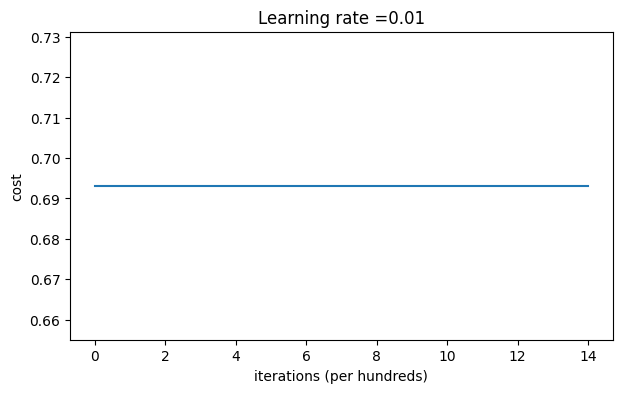

On the train set:
Accuracy: 0.5
On the test set:
Accuracy: 0.5


In [46]:
parameters = model(train_X, train_Y, initialization = "zeros")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

The performance is so bad as the cost is just constant.

In [47]:
print ("predictions_train = " + str(predictions_train))
print ("predictions_test = " + str(predictions_test)) 

predictions_train = [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0]]
predictions_test = [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


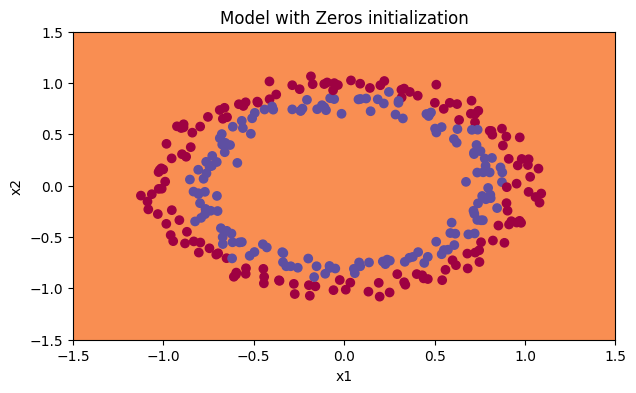

In [48]:
plt.title("Model with Zeros initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

As we have seen that the performance is really bad  as the same output is given by all neurons present in the network. This is because when u initialize all weights and bais parameters by 0 there is no asymmetry but all nuerons tend to learn the same way . So as such significance of the envolvement of number of neurons is finished . So one need to remember The weights W[l] should be initialized randomly to break symmetry. - It is however okay to initialize the biases b[l]
 to zeros. Symmetry is still broken so long as W[l]
 is initialized randomly.

This leads to an introduction to randomm initialization.

In [41]:
def initialize_parameters_random(layers_dims):
    np.random.seed(3)
    parameters={}
    L = len(layers_dims)
    print("Number of layers in a neural network are:" , L)
    for i in range(1,L):
        parameters['W' + str(i)] = np.random.randn(layers_dims[i], layers_dims[i-1])*10
        parameters['b' + str(i)] = np.zeros((layers_dims[i], 1))
    return parameters

In [42]:
parameters = initialize_parameters_random([3, 2, 1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

Number of layers in a neural network are: 3
W1 = [[ 17.88628473   4.36509851   0.96497468]
 [-18.63492703  -2.77388203  -3.54758979]]
b1 = [[0.]
 [0.]]
W2 = [[-0.82741481 -6.27000677]]
b2 = [[0.]]


Number of layers in a neural network are: 4
Cost after iteration 0: inf
Cost after iteration 1000: 0.6244633539548546


c:\Users\HP\Downloads\deep-learning-specialisation\course2(Improving deep neural network)\init_utils.py:145: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
c:\Users\HP\Downloads\deep-learning-specialisation\course2(Improving deep neural network)\init_utils.py:145: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)


Cost after iteration 2000: 0.5979515302175168
Cost after iteration 3000: 0.5637268887887664
Cost after iteration 4000: 0.5501339086560004
Cost after iteration 5000: 0.5444208078041783
Cost after iteration 6000: 0.5374183338193007
Cost after iteration 7000: 0.47406094779900765
Cost after iteration 8000: 0.397762829863247
Cost after iteration 9000: 0.39347104444669706
Cost after iteration 10000: 0.3920233025629581
Cost after iteration 11000: 0.38922094583102895
Cost after iteration 12000: 0.38614145828692353
Cost after iteration 13000: 0.3849798116135391
Cost after iteration 14000: 0.38278175354946176


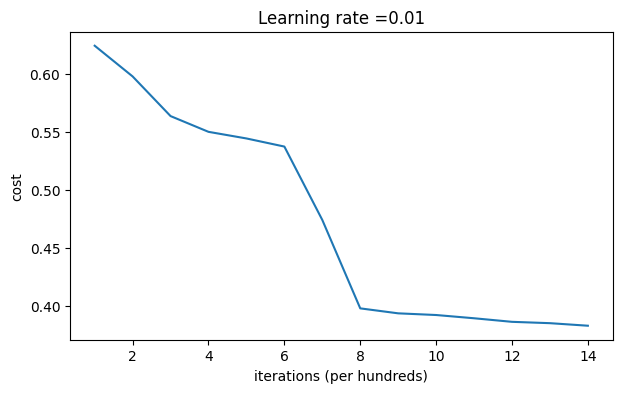

On the train set:
Accuracy: 0.83
On the test set:
Accuracy: 0.86


In [43]:
# check the cost curve
parameters = model(train_X, train_Y, initialization = "random")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

As its a clear depiction from the curve that the this method of initialisation has perfomed alot better than the zero initialization method . 

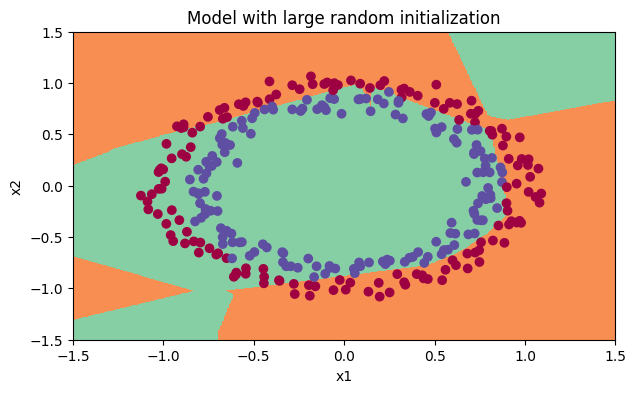

In [36]:
plt.title("Model with large random initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

some observations that the cruve and visualizations show are:
1. The initial costs are really high
2. As the initialisation is quite random so when it realises that the prediction is wrong it can lead to high losses which again affects the accuracy and eventually affecting results.
if the model is trained for a longer period of time than may be the  results are better but initialization that too with random values can lead to lower initial optimisation and results .

Now all the two methods leads to the final implementation of the 3rd method  = He method of initilization .

In [37]:
def initialize_parameters_he(layers_dims):
    L = len(layers_dims)
    parameters={}
    print("Number of layers in the network are:" , L)
    for i in range(1,L):
        parameters['W' + str(i)] = np.random.randn(layers_dims[i], layers_dims[i-1])*np.sqrt(2/layers_dims[i-1])
        parameters['b' + str(i)] = np.zeros((layers_dims[i], 1))
    return parameters

In [38]:
# printing the values
parameters = initialize_parameters_random([3, 2, 1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

Number of layers in a neural network are: 3
W1 = [[ 17.88628473   4.36509851   0.96497468]
 [-18.63492703  -2.77388203  -3.54758979]]
b1 = [[0.]
 [0.]]
W2 = [[-0.82741481 -6.27000677]]
b2 = [[0.]]


Number of layers in the network are: 4
Cost after iteration 0: 0.7179076573198092
Cost after iteration 1000: 0.665068241199161
Cost after iteration 2000: 0.6235559633278303
Cost after iteration 3000: 0.5527421393370986
Cost after iteration 4000: 0.4402581429317108
Cost after iteration 5000: 0.3168344464889104
Cost after iteration 6000: 0.2196133039396769
Cost after iteration 7000: 0.16608494137174437
Cost after iteration 8000: 0.13233083772399246
Cost after iteration 9000: 0.10895979360470459
Cost after iteration 10000: 0.0918307369761112
Cost after iteration 11000: 0.07917120336393071
Cost after iteration 12000: 0.06767506131717498
Cost after iteration 13000: 0.05794734903088781
Cost after iteration 14000: 0.05225215432728894


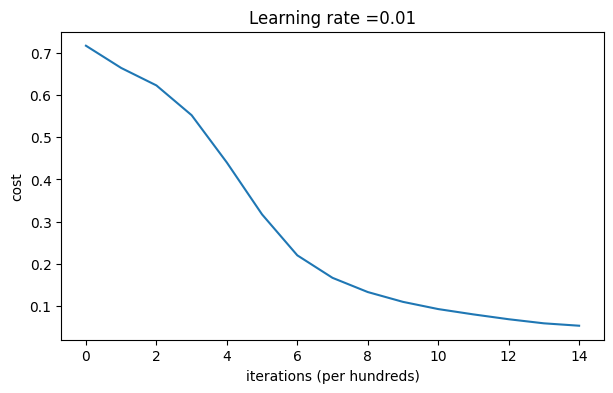

On the train set:
Accuracy: 0.9933333333333333
On the test set:
Accuracy: 0.95


In [39]:
# check the cost curve
parameters = model(train_X, train_Y, initialization = "he")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

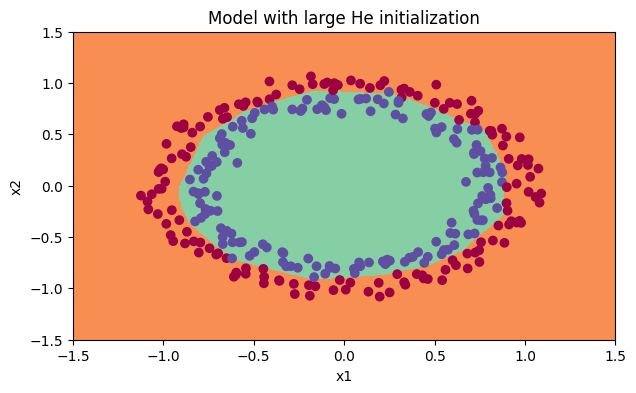

In [40]:
plt.title("Model with large He initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

Hence the clear indication that the He model was able to correctly distinguish the regions with red and blue markers with an accuracy of about 99 percent which is the highest of all three.